--- 
Project for the course in Microeconometrics | Summer 2021, M.Sc. Economics, Bonn University | [Bahar Coskun](https://github.com/baharcos)

# Replication of Joshua Angrist, Daniel Lang, and Philipp Oreopoulous (2009) <a class="tocSkip">   
---

The following notebook contains my replication of the results of

> Angrist, J., Land, D., & Oreopoulos, P. (2009). Incentives And Services For College Achievement: Evidence From A Randomized Trial. American Economic Journal: Applied Economics, 1(1), 136-63.

#### Downloading and Viewing this Notebook

* To ensure that every image and format is displayed properly, I recommend to download this notebook from its repository on [GitHub](https://github.com/OpenSourceEconomics/ose-data-science-course-project-baharcos). Other viewing options like _MyBinder_ or _NBViewer_ might have issues displaying formulas and formatting.

* The original data, code and paper can be found [here](https://economics.mit.edu/faculty/angrist/data1/data/angrist,1)

#### Information about the Replication and Individual Contributions

* I have labeled all figures and tables in this notebook in an ascending order to prevent confusion of the reader. If it is a replication, I always indicate the label of the corresponding figure and table referencing to the original paper.

* I always explicitly state, when I give the opinion of the author.

* All sections and subsections that are labeled as *Extension* are my independent contributions.  

* For more detailed information it is always refered to Angrist et. al. [(2009)](https://www.aeaweb.org/articles?id=10.1257/app.1.1.136) I replicated the results from the main analysis.

* The layout and the structure of the notebook is inspired by Annica Gehlen's replication of Jason M. Lindo, Nicholas J. Sanders & Philip Oreopoulos (2010) from the 2019 iteration of the Microeconometrics class. [(link)](https://github.com/amageh/replication-performance-standards/blob/master/replication-notebook.ipynb)

<h1> Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#1.-Introduction" data-toc-modified-id="1.-Introduction-1">1. Introduction</a></span></li><li><span><a href="#2.-Data" data-toc-modified-id="2.-Data-2">2. Data</a></span></li><li><span><a href="#3.-Identification and Empirical Strategy" data-toc-modified-id="3.-Identification and Empirical Strategy-2">3. Identification and Empirical Strategy</a></span></li> <li><span><a href="#4.-Replication-of-Angrist-et-al.-(2009)" data-toc-modified-id="4.-Replication-of-Angrist-et-al.-(2009)-4">4. Replication-of-Angrist-et-al.-(2009)</a></span></li><li><span><a href="#5.-Conclusion-and-Critical-Assessment" data-toc-modified-id="5.-Conclusion-and-Critical-Assessment-5">5. Conclusion  and Critical Assessment</a></span></li>
<li><span><a href="#6.-References" data-toc-modified-id="6.-References-6">6. References</a></span></li></ul></div></li>

---

In [1]:
import statsmodels.formula.api as smf
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from auxiliary.colors import get_colors
from auxiliary.colors import plot_colors
from auxiliary.plot import participation_share_plot

In [2]:
colors = get_colors('categorical', 12)

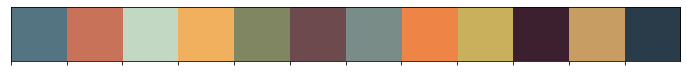

In [28]:
plot_colors('categorical', 12)

---
# 1. Introduction
---
Will need to work on the argumentation:

***Motivation***:
The motivation of Angrist et al.(2009) comes from the importance of academic performance, not dropping out from the program and completing on time for post-secondary education experience. Something that many students, particularly ones from low-income families, struggle to achieve. One reason for this is poor study skills. As a response many North American universities offer academic services to improve skills like note taking, time management or goal-setting. However, the non-experimental research on academic support services for college students have found mixed results even though experimental design of the same services on high school students drew a more promising picture. 
Furthermore to motivate better academic performance merit scholarship have been part of college education for a long time. Although only a small group of spectacular students have benefitted from this financial incentive. 

***Study Design***: \
Angrist et al. (2009) analysis the results of Student Achievement and Retention (STAR) Demonstration Project. STAR is designed as a randomised evaluation to learn more about the effects of support services and financial incentives on academic performance at a satellite campus of a large Canadian university that is in U.S. terms a large state university with heavily subsidised tuition fees. Students attending are mostly from local area and have similar high school background which eliminate geographic background differences that could arise in the treatment.

***Estimation Strategy***:\
Students are randomly allocated into control or one of the treatment groups. Students in a treatment group receive an offer and the have to signed up to be eligible which is not random. In order to estimate the causal impact of financial incentives and academic support services Angrist et al. (2009) use **instrumental variables (IV)**. However, due to the low compliance rate most results reported are **intent-to-treat (ITT)** estimates. The data comes from 1656 full time first year students combining administrative data and survey data which the students took **prior** to the treatment selection.


**Main variables** 

| **Treatments**   | **Outcome Variables**  |
|------------------|------------------------|
| Services         | GPA                    |
| Incentives       | On probation/withdrew  |              
| Combined         | Credits earned         | 


***Results***: \
Main findings of Angrist et al. (2009) are: 
- Females use the services much more than males
- Male achievement remained unchanged with the intervention 
- Services itself failed to attract students
- Female achievement in services combined with financial incentives increased students GPA about 0.35$\sigma$


Write what is in this notebook

---
# 2. Study Design, Data and Descriptives(the extention)
---
## 2.1. STAR Demonstration Project

STAR randomly assigned entering first-year undergreduates into the control group or one of the treatment groups below:
- service strategy SSP: peer advisors are trained upper-class students  in the treated students' program offering academic advise and suggestions for coping with first year of uni. advisor email regularly(at least biweekly) about university assimilation, scheduling, studying, time management, reminding availability of the services to meet at STAR office. Also trained for circumstances to call for professional help + FSG's to improve study habits complement normal tutorials, develop reasoning skills. Focus: critical thinking, note-taking, graphic organisation, questioning techniques, vocabulary acquisition, and test prediction and preparation.
offered approx. half of first year courses. Some of large courses offered the service to all students because it was in place before the experiment

- incentive strategy SFP: award targets are based on high school grades\
lowest grade quartile: $5000 for B, $1000 for C+ \
second quartile: $5000 for B+ and $1000 for B- \
third quartile: $5000 for A- and $1000 for B \
to qualify had to take at least 4 courses (to complete in time 5 courses per semester) and sign up for second year(all students in the program meeting targets did so) \
Targets based on trade off between program costs and award accessibility

- combined strategy SFSP: no link between two strategies(you can use the service without being eligible to fellowship and can be eligible for fellowship without using the service)

## 2.2 Data

Main source of data is baselie survey: write which varaibles come from administrative data and which from survey.



In [16]:
data = pd.read_stata('data/STAR_public_use.dta') #read the data

In [12]:
data.info() # check variables, missing values and data types

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1656 entries, 0 to 1655
Data columns (total 48 columns):
 #   Column              Non-Null Count  Dtype   
---  ------              --------------  -----   
 0   GPA_year1           1537 non-null   float32 
 1   GPA_year2           1368 non-null   float32 
 2   age                 1656 non-null   int8    
 3   chooseUTM           1472 non-null   float32 
 4   compsurv            1656 non-null   float32 
 5   control             1656 non-null   int8    
 6   credits_earned1     1575 non-null   float32 
 7   credits_earned2     1575 non-null   float32 
 8   dad1                1472 non-null   float32 
 9   dad2                1472 non-null   float32 
 10  dad_edn             1472 non-null   category
 11  english             1656 non-null   int8    
 12  female              1656 non-null   int8    
 13  finish4             1472 non-null   float64 
 14  goodstanding_year1  1634 non-null   float32 
 15  goodstanding_year2  1634 non-null   fl

### 2.2.1 Data Cleaning
Angrist et al. (2009) exlude students from analysis who did not show up (no shows) and students who took less then 2 coarses from the analysis.

In [17]:
data = data[data['noshow']==0] #exclude no shows
data = data.dropna(subset=['grade_20059_fall']) #exclude students who did not recieve any grade in fall
data = data.dropna(subset=['GPA_year1']) #exclude student who did not recieve any first year gpa
data = data[data['credits_earned1']>=2] # exclude student who earned less than 2 credits in first year

## 2.3 Extention | Data Descriptives

In [36]:
data[['GPA_year1', 'GPA_year2', 'grade_20059_fall', 'credits_earned1', 'credits_earned2', 'work1',
      'goodstanding_year1', 'goodstanding_year2']].describe()

,GPA_year1,GPA_year2,grade_20059_fall,credits_earned1,credits_earned2,work1,goodstanding_year1,goodstanding_year2
count,1108.000000,1021.000000,1108.000000,1108.000000,1108.000000,1020.000000,1108.000000,1108.000000
mean,2.069394,2.248090,67.544838,2.835289,2.840027,0.761765,0.609206,0.778881
std,0.747877,0.789052,8.518441,0.633536,1.340205,0.426219,0.488148,0.415188
min,0.530000,0.000000,14.000000,2.000000,0.000000,0.000000,0.000000,0.000000
25%,1.480000,1.770000,61.500000,2.500000,2.000000,1.000000,0.000000,1.000000
50%,2.010000,2.300000,67.666664,3.000000,3.000000,1.000000,1.000000,1.000000
75%,2.610000,2.800000,73.000000,3.000000,3.500000,1.000000,1.000000,1.000000
max,4.000000,4.000000,94.000000,7.500000,7.500000,1.000000,1.000000,1.000000


In [35]:
data.dad_edn.value_counts()

completed a bachelor s degree (b.a., b.comm., etc)              286
completed a community college diploma program                   166
graduated from high school                                      139
completed a master s degree (m.a., m.sc., etc)                  136
did not finish high school                                       88
don t know/not applicable                                        72
completed a doctoral degree or professional program (ph.d.,      63
attended university but did not complete bachelor s degree       41
 attended a community college but did not complete diploma       29
Name: dad_edn, dtype: int64

In [34]:
data.mom_edn.value_counts()

completed a bachelor s degree (b.a., b.comm., etc)              260
graduated from high school                                      220
completed a community college diploma program                   214
completed a master s degree (m.a., m.sc., etc)                   85
don t know/not applicable                                        71
did not finish high school                                       69
attended university but did not complete bachelor s degree       41
 attended a community college but did not complete diploma       34
completed a doctoral degree or professional program (ph.d.,      26
Name: mom_edn, dtype: int64

<AxesSubplot:title={'center':'Mothertongue of students'}>

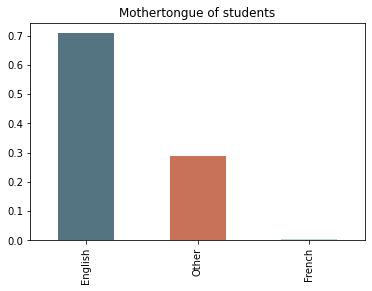

In [26]:
data.mtongue.value_counts(normalize=True).plot.bar(color=colors, title='Mothertongue of students')

<AxesSubplot:title={'center':'Leaves studing to last minute'}>

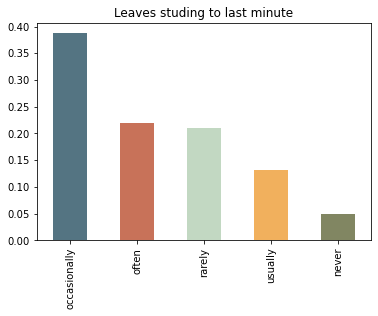

In [27]:
data.lastmin.value_counts(normalize=True).plot.bar(color=colors, title = 'Leaves studing to last minute' )

**Plot Ideas**
- an explainatory table that explains variables or change the names of the variables
- plotting treatment =1 against sign-up = 1 (the compliance rate)
- female male ratio
- figure 1
- mothertongue
- grade distributions
- grade distributions by gender in one graph
- mother tongue distribution by people who signed up and offered
- gender distribution by sign up and offer
- last minute proportion: maybe cross validity
- probation and goodstanding by treatment

In [23]:
info = data[['sex','ssp', 'sfsp', 'sfp', 'ssp_p', 'sfp_p', 'sfsp_p']].value_counts(normalize=True).sort_index()
info

sex  ssp  sfsp  sfp  ssp_p  sfp_p  sfsp_p
F    0.0  0.0   0.0  0.0    0.0    0.0       0.341155
                1.0  0.0    0.0    0.0       0.006318
                            1.0    0.0       0.090253
          1.0   0.0  0.0    0.0    0.0       0.010830
                                   1.0       0.042419
     1.0  0.0   0.0  0.0    0.0    0.0       0.037004
                     1.0    0.0    0.0       0.050542
M    0.0  0.0   0.0  0.0    0.0    0.0       0.259025
                1.0  0.0    0.0    0.0       0.010830
                            1.0    0.0       0.049639
          1.0   0.0  0.0    0.0    0.0       0.009928
                                   1.0       0.023466
     1.0  0.0   0.0  0.0    0.0    0.0       0.036101
                     1.0    0.0    0.0       0.032491
dtype: float64

In [15]:
ssp = data[data['ssp']== 1.0]
ssp_signup_offer_shares = ssp[['sex','ssp_p']].value_counts(normalize=True).sort_index()
ssp_signup_offer_shares

sex  ssp_p
F    0.0      0.236994
     1.0      0.323699
M    0.0      0.231214
     1.0      0.208092
dtype: float64

In [6]:
sfp = data[data['sfp']== 1.0]
sfp_signup_offer_shares = sfp[['sex','sfp_p']].value_counts(normalize=True).sort_index()
sfp_signup_offer_shares

sex  sfp_p
F    0.0      0.040230
     1.0      0.574713
M    0.0      0.068966
     1.0      0.316092
dtype: float64

In [7]:
sfsp = data[data['sfsp']== 1.0]
sfsp_signup_offer_shares = sfsp[['sex','sfsp_p']].value_counts(normalize=True).sort_index()
sfsp_signup_offer_shares

sex  sfsp_p
F    0.0       0.125000
     1.0       0.489583
M    0.0       0.114583
     1.0       0.270833
dtype: float64

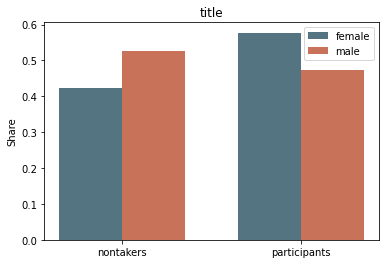

In [10]:
participation_share_plot(ssp, 'Service Treatment Group Sign-up Shares' , 'ssp_p')

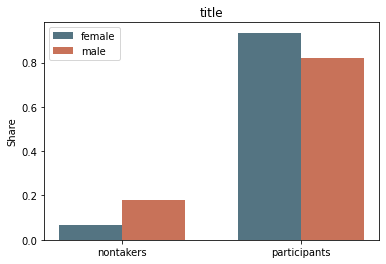

In [9]:
participation_share_plot(sfp, 'Incentives Treatment Group Sign-up Shares' , 'sfp_p')

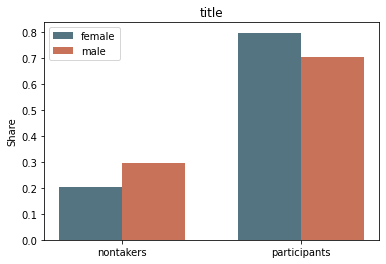

In [8]:
participation_share_plot(sfsp, 'Combined Treatment Group Sign-up Shares' , 'sfsp_p')

---
# 3. Identification and Empirical Strategy
---
The main goal of the Angrist et al. (2009) is to determine the causal effect of incentives and services on academic performance.

Incomplete random assignment, randomised offer do not force students into participate, sign up creates selection bias.  Sign-up procedure used to determine who is actually motivated to use the program by paying a small cost
To make sure that students would use the program to some degree or care to  use
Only people who received an offer can participate in one of the programs and participation is expected to improve academic performance.
The first stage is the effect of offer on sign-up rates. Which is by offer how likely you are to sign up This is given by the compliance rate. 
The instrument is the offer 
Second stage is effect of participation on academic performance
Reduced form(ITT: effect of offer on academic performance) = effect of offer on sign-up rates x effect of participation on academic performance
What we want to find out: effect of participation on academic performance


<img src="files/causalgraph.png" width=500 />

**Key Assumptions:**
Substantial first stage: The offer should really change the sign up, as only students who recieves an offer can sign up, it is safe to say that this assumption holds

Independence assumption: The instrument has to be as good as randomly assigned. The offer is given to students b random assignment. The authors still run checks for balance on treatment groups with control variables in table 1. Controlling for no group of students are suspiciously more likely to selected for treatment. 

Exclusion restriction:  We require the instrument changing outcome solely through the variable of interest. The authors check this by running an additional over-identified iv regression.??

If these assumptions hold the causal effect of participation can be identified by iv.
The reported results are mainly ITT. I will run additional checks on which group is more likely to sign up.

**Evaluation Framework**\
ITT: no correction for sign up and dilluted by non compliance
IV: the offer of services for program sign-up (to estimate the effect of treatment on those who signed up who are not random)
$P_i = 1$ represents people who gave concent(signed up) to recieve emails \
$Z_i$ is the random variable representing random assignment offer of treatment

\begin{equation}
E[Y_{1i} - Y_{0i} |P_i=1] = (E[Y_i|Z_i = 1] - E[Y_i|Z_i = 0]) / Pr[P_i = 1|Z_i = 1]
\end{equation}

- $E[Y_{1i} - Y_{0i} |P_i=1]$ is the true casual effect of participation on one of the treatment programs.

- $E[Y_i|Z_i = 1] - E[Y_i|Z_i = 0]$ is the intend-to-treat estimate given by the service offer

- $Pr[P_i = 1|Z_i = 1]$ is the compliance rate

---
# 4. Replication of Angrist et al. (2009)
---

Main results they report on are reduced form ITT(intent-to-treat) estimates

In [25]:
rslt_all = smf.ols(formula="grade_20059_fall ~ ssp + sfp + sfsp", data=data).fit()
rslt_all.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:       grade_20059_fall   R-squared:                       0.005
Model:                            OLS   Adj. R-squared:                  0.003
Method:                 Least Squares   F-statistic:                     2.523
Date:                Fri, 23 Jul 2021   Prob (F-statistic):             0.0563
Time:                        00:04:45   Log-Likelihood:                -5445.0
No. Observations:                1398   AIC:                         1.090e+04
Df Residuals:                    1394   BIC:                         1.092e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     63.8430      0.408    156.289      0.000      63.042      64.644
ssp            0.2533      0.916      0.277      0.782      -1.544       2.050
sfp            1.9876      0.903      2.202      0.028       0.217       3.758
sfsp           2.2608      1.170      1.932      0.054      -0.034       4.556
==============================================================================
Omnibus:                      423.567   Durbin-Watson:                   2.019
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1653.958
Skew:                          -1.420   Prob(JB):                         0.00
Kurtosis:                       7.509   Cond. No.                         4.00
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [24]:
#exclude no shows
data = data[data['noshow']==0]

In [29]:
data_female = data[data['sex']== 'F']
result_female = smf.ols(formula="grade_20059_fall ~ ssp + sfp + sfsp", data = data_female).fit()
result_female.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:       grade_20059_fall   R-squared:                       0.015
Model:                            OLS   Adj. R-squared:                  0.011
Method:                 Least Squares   F-statistic:                     3.955
Date:                Fri, 23 Jul 2021   Prob (F-statistic):            0.00816
Time:                        00:15:18   Log-Likelihood:                -3093.3
No. Observations:                 796   AIC:                             6195.
Df Residuals:                     792   BIC:                             6213.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     62.8125      0.540    116.327      0.000      61.753      63.872
ssp            0.7544      1.223      0.617      0.538      -1.646       3.155
sfp            2.9326      1.155      2.539      0.011       0.666       5.200
sfsp           4.1676      1.541      2.704      0.007       1.142       7.193
==============================================================================
Omnibus:                      238.600   Durbin-Watson:                   1.995
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              970.287
Skew:                          -1.350   Prob(JB):                    2.02e-211
Kurtosis:                       7.687   Cond. No.                         4.01
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [31]:
data_male = data [data['sex'] == 'M']
result_male = smf.ols(formula="grade_20059_fall ~ ssp + sfp + sfsp", data=data_male).fit()
result_male.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:       grade_20059_fall   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                 -0.004
Method:                 Least Squares   F-statistic:                    0.1698
Date:                Fri, 23 Jul 2021   Prob (F-statistic):              0.917
Time:                        00:15:46   Log-Likelihood:                -2346.8
No. Observations:                 602   AIC:                             4702.
Df Residuals:                     598   BIC:                             4719.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     65.1736      0.622    104.830      0.000      63.953      66.395
ssp           -0.4306      1.377     -0.313      0.755      -3.135       2.274
sfp            0.7921      1.440      0.550      0.582      -2.036       3.620
sfsp          -0.2210      1.788     -0.124      0.902      -3.733       3.291
==============================================================================
Omnibus:                      201.151   Durbin-Watson:                   2.028
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              731.479
Skew:                          -1.535   Prob(JB):                    1.45e-159
Kurtosis:                       7.443   Cond. No.                         3.99
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [57]:
rslt_all_gpa_year1 = smf.ols(formula= "GPA_year1 ~ ssp + sfp + sfsp", data=data).fit()
rslt_all_gpa_year1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              GPA_year1   R-squared:                       0.002
Model:                            OLS   Adj. R-squared:                 -0.000
Method:                 Least Squares   F-statistic:                    0.8093
Date:                Fri, 23 Jul 2021   Prob (F-statistic):              0.489
Time:                        00:37:04   Log-Likelihood:                -1784.0
No. Observations:                1374   AIC:                             3576.
Df Residuals:                    1370   BIC:                             3597.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.7974      0.031     58.508      0.000       1.737       1.858
ssp            0.0559      0.069      0.813      0.416      -0.079       0.191
sfp            0.0315      0.068      0.463      0.643      -0.102       0.165
sfsp           0.1256      0.088      1.434      0.152      -0.046       0.298
==============================================================================
Omnibus:                       45.216   Durbin-Watson:                   1.978
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               21.910
Skew:                           0.064   Prob(JB):                     1.75e-05
Kurtosis:                       2.395   Cond. No.                         3.99
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

<AxesSubplot:ylabel='Density'>

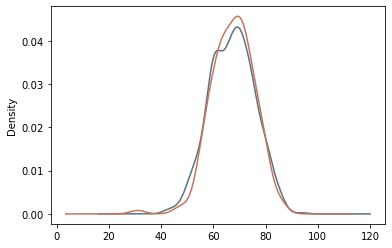

In [45]:
control = data[data['control'] == 1]
control.grade_20059_fall.plot.kde()
ssp.grade_20059_fall.plot.kde()

<AxesSubplot:ylabel='Density'>

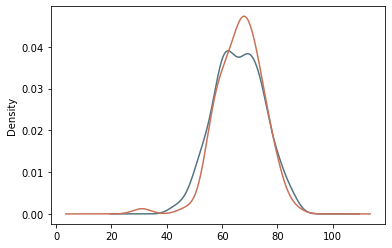

In [48]:
control[control['sex']== 'F'].grade_20059_fall.plot.kde()
ssp[ssp['sex']== 'F'].grade_20059_fall.plot.kde()

<AxesSubplot:ylabel='Density'>

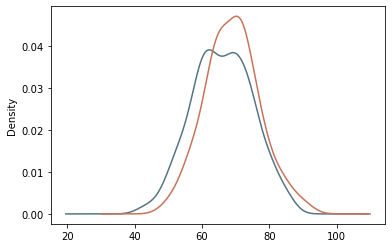

In [49]:
control[control['sex']== 'F'].grade_20059_fall.plot.kde()
sfp[sfp['sex']== 'F'].grade_20059_fall.plot.kde()

<AxesSubplot:ylabel='Density'>

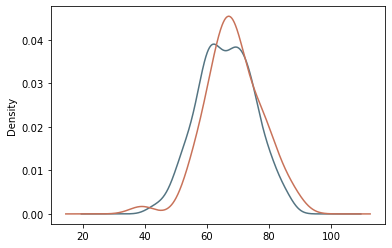

In [50]:
control[control['sex']== 'F'].grade_20059_fall.plot.kde()
sfsp[sfsp['sex']== 'F'].grade_20059_fall.plot.kde()

<AxesSubplot:ylabel='Density'>

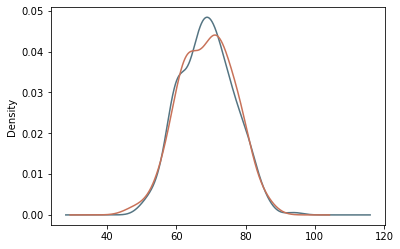

In [51]:
control[control['sex']== 'M'].grade_20059_fall.plot.kde()
ssp[ssp['sex']== 'M'].grade_20059_fall.plot.kde()

<AxesSubplot:ylabel='Density'>

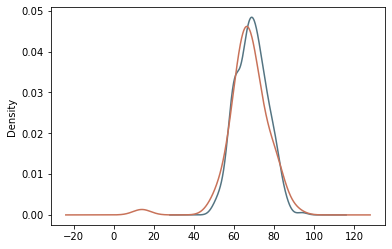

In [52]:
control[control['sex']== 'M'].grade_20059_fall.plot.kde()
sfp[sfp['sex']== 'M'].grade_20059_fall.plot.kde()

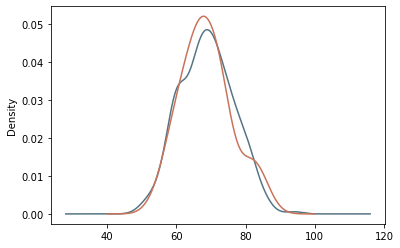

In [58]:
a = control[control['sex']== 'M'].grade_20059_fall.plot.kde()
b = sfsp[sfsp['sex']== 'M'].grade_20059_fall.plot.kde()

1.8215205669403076

---
# 5. Extention
---

<AxesSubplot:ylabel='Density'>

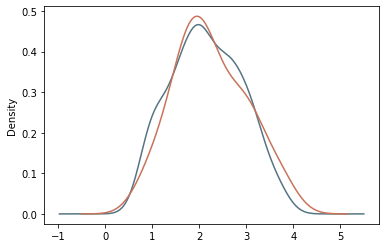

In [64]:
control[control['sex']== 'M'].GPA_year1.plot.kde()
sfsp[sfsp['sex']== 'M'].GPA_year1.plot.kde()

---
# 6. Conclusion and Critical Assessment
---

---
# 7. References
---